_**Model-based Machine Learning** - Spring 2023_

Hugo Alcalde - Berta Plandolit - Anna Rifé - Helena Sofía Yaben 

In [1]:
#All the necessary packages we used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar
import seaborn as sns
sns.set_style("whitegrid")

# <font color='darkgreen'> <center> <h3>Bike Sharing Demand</h3> </center>
    
### 1. Import data

In [2]:
data_train= pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

print('Length data train:', len(data_train))
print('Length data test:', len(data_test))

X_train= data_train.iloc[:,:-1]
Y_train= data_train['count']

X_train

Length data train: 10886
Length data test: 6493


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117


In [3]:
print('Number of missing values (Y):',Y_train.isna().sum())
print('Number of missing values (X):',X_train.isna().sum().sum())

Number of missing values (Y): 0
Number of missing values (X): 0


In [4]:
def extract_datetime(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Extracts the year, month, day of the month, weekday, and hour from the datetime column of a dataframe
    
    Args:
    df (pd.DataFrame): dataframe containing the datetime column
    
    Returns:
    pd.DataFrame: dataframe with new columns for year, month, day, weekday, and hour
    '''
    # Convert the datetime column to datetime format
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    # Extract the year, month, day, weekday, and hour columns
    df['year'] = df['datetime'].dt.year
    df['month'] = df['datetime'].dt.month
    df['day'] = df['datetime'].dt.day
    df['weekday'] = df['datetime'].dt.day_name()
    df['hour'] = df['datetime'].dt.hour
    
    # Drop the original datetime column
    df.drop('datetime', axis=1, inplace=True)
    
    return df

### 2. Preprocess Data

In [5]:
X_train = extract_datetime(X_train)

# De momento, quito esta parte porque para la regresión es más útil tener las variables categóricas como números

#X_train['season'] = X_train['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
#X_train['holiday'] = X_train['holiday'].map({0:'Not holiday',1:'holiday'})
#X_train['workingday'] = X_train['workingday'].map({0:'not workingday',1:'workingday'})
#X_train['weather'] = X_train['weather'].map({1:'Clear, Few clouds, Partly cloudy, Partly cloudy',
                                   #2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                   #3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                   #4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})
            
            

In [6]:
time_intervals = [-1, 6, 10,15, 20, 24]

# Create a column of time ranges
X_train['time_range'] = pd.cut(X_train['hour'], bins=time_intervals, labels=[0, 1, 2, 3,4])

In [7]:
X_train

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,weekday,hour,time_range
0,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,Saturday,0,0
1,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,Saturday,1,0
2,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,Saturday,2,0
3,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,Saturday,3,0
4,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,Saturday,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,Wednesday,19,3
10882,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,Wednesday,20,3
10883,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,Wednesday,21,4
10884,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,Wednesday,22,4


In [8]:
# Change the categorical variables to 0,1,2... (some of them start with one)

X_train["season"] = X_train["season"].replace({1: 0, 2: 1, 3: 2, 4: 3})
X_train["weather"] = X_train["weather"].replace({1: 0, 2: 1, 3: 2, 4: 3})

In [9]:
# Selecting the variables we are interested in for the first simple linear regression: 

X_train_regression = X_train[["season", "holiday", "workingday", "weather", "time_range",  "temp", "atemp", "humidity", "windspeed"]]

In [10]:
X_train_regression.dtypes

season           int64
holiday          int64
workingday       int64
weather          int64
time_range    category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
dtype: object

In [11]:
for i in ["season", "holiday", "workingday", "weather"] : 
    X_train_regression[i] = X_train_regression[i].astype("category")
# One hot encoding : 

def one_hot_encode(df):
    categorical_cols = df.select_dtypes(include='category').columns
    
    for col in categorical_cols:
        encoded_cols = pd.get_dummies(df[col], prefix=col, drop_first=False) 
        df = pd.concat([df, encoded_cols], axis=1)
        df = df.drop(columns=[col])
    
    return df
X_train_regression = one_hot_encode(X_train_regression)


/var/folders/10/xzk2l09d3_g6x6v7c5tmyw7m0000gn/T/ipykernel_68351/1330130044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_regression[i] = X_train_regression[i].astype("category")
/var/folders/10/xzk2l09d3_g6x6v7c5tmyw7m0000gn/T/ipykernel_68351/1330130044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_regression[i] = X_train_regression[i].astype("category")
/var/folders/10/xzk2l09d3_g6x6v7c5tmyw7m0000gn/T/ipykernel_68351/1330130044.py:2: SettingWithCopyWarning: 
A value is trying t

En el One-Hot encoding, en principio, si quitas una variable no pasa nada porque se puede extrapolar de que las otras variables sean 0. Pero he decidido quitarlo porque (1) No tenemos un intercept para cada variable y, por lo tanto, nuestro intercept general tendrá una distribución más compleja de aprender porque incluirá información de varias variables, (2) Es imposible de interpretar y una de las razones por las que queremos utilizar un modelo sencillo es para poder investigar un poco la relación entre las variables. 

In [13]:
X_train_regression.dtypes

temp            float64
atemp           float64
humidity          int64
windspeed       float64
season_0          uint8
season_1          uint8
season_2          uint8
season_3          uint8
holiday_0         uint8
holiday_1         uint8
workingday_0      uint8
workingday_1      uint8
weather_0         uint8
weather_1         uint8
weather_2         uint8
weather_3         uint8
time_range_0      uint8
time_range_1      uint8
time_range_2      uint8
time_range_3      uint8
time_range_4      uint8
dtype: object

In [14]:
X_train_regression.shape[1] - 5

16

In [15]:
Y_train_regression = X_train["casual"] + X_train["registered"]

In [16]:
Y_train_regression #Same as variable count Ytrain

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Length: 10886, dtype: int64

### 3. Simple Linear Regression

In [17]:
from sklearn import linear_model
import numpy as np 


# Non-Probabilistic Approach : 

def compute_error(trues, predicted):
    corr = np.corrcoef(predicted, trues)[0,1]
    mae = np.mean(np.abs(predicted - trues))
    rae = np.sum(np.abs(predicted - trues)) / np.sum(np.abs(trues - np.mean(trues)))
    rmse = np.sqrt(np.mean((predicted - trues)**2))
    r2 = max(0, 1 - np.sum((trues-predicted)**2) / np.sum((trues - np.mean(trues))**2))
    return corr, mae, rae, rmse, r2


regr = linear_model.Ridge()
regr.fit(X_train_regression, Y_train_regression)
y_hat = regr.predict(X_train_regression)



corr, mae, rae, rmse, r2 = compute_error(Y_train_regression, y_hat)
print("CorrCoef: %.3f\nMAE: %.3f\nRMSE: %.3f\nR2: %.3f" % (corr, mae, rmse, r2))

CorrCoef: 0.741
MAE: 88.482
RMSE: 121.630
R2: 0.549


In [18]:
# Probabilistic Approach : 


import numpy as np
import pandas as pd   # We import Pandas!
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
import torch
import itertools

import pyro
import pyro.distributions as dist
from pyro.contrib.autoguide import AutoDiagonalNormal, AutoMultivariateNormal
from pyro.infer import MCMC, NUTS, HMC, SVI, Trace_ELBO
from pyro.optim import Adam, ClippedAdam

# fix random generator seed (for reproducibility of results)
np.random.seed(42)



def model(X, obs=None):

    alpha = pyro.sample("alpha", dist.Normal(0., 1.))                   # Prior for the bias/intercept
    beta  = pyro.sample("beta", dist.Normal(torch.zeros(X.shape[1]), 
                                            torch.ones(X.shape[1])).to_event())    # Priors for the regression coeffcients 
    
    with pyro.plate("data"):
        y = pyro.sample("y", dist.Poisson(torch.exp(alpha + X.matmul(beta))), obs=obs)
        
    return y

ModuleNotFoundError: No module named 'torch'

In [20]:
X_train_regression_numpy = np.array(X_train_regression)

In [21]:
X_train_regression_numpy.shape

(10886, 21)

In [24]:
y_train_regression_torch = torch.tensor(Y_train_regression).float()

In [ ]:
X_train_regression_torch = torch.tensor(X_train_regression_numpy).float()

: 

: 

In [25]:
# Define guide function
guide = AutoDiagonalNormal(model)

# Reset parameter values
pyro.clear_param_store()

In [ ]:
# Define the number of optimization steps
n_steps = 100000

# Setup the optimizer
adam_params = {"lr": 0.001}
optimizer = ClippedAdam(adam_params)

# Setup the inference algorithm
elbo = Trace_ELBO(num_particles=1)
svi = SVI(model, guide, optimizer, loss=elbo)

# Do gradient steps
for step in range(n_steps):
    elbo = svi.step(X_train_regression_torch, y_train_regression_torch)
    if step % 500 == 0:
        print("[%d] ELBO: %.1f" % (step, elbo))

In [57]:
from pyro.infer import Predictive

predictive = Predictive(model, guide=guide, num_samples=1000,
                        return_sites=("alpha", "beta"))
samples = predictive(X_train_regression_torch, y_train_regression_torch)

In [65]:
alpha_samples = samples["alpha"].detach().numpy()
beta_samples = samples["beta"].detach().numpy()
y_hat = np.round(np.mean(np.exp(alpha_samples.T + np.dot(X_train_regression_numpy, beta_samples[:,0].T)), axis=1))

# convert back to the original scale
preds = y_hat # no need to do any conversion here because the Poisson model received untransformed y's


corr, mae, rae, rmse, r2 = compute_error(Y_train_regression, preds)
print("CorrCoef: %.3f\nMAE: %.3f\nRMSE: %.3f\nR2: %.3f" % (corr, mae, rmse, r2))

CorrCoef: 0.760
MAE: 80.858
RMSE: 117.828
R2: 0.577


/Users/cerebriuhugo/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


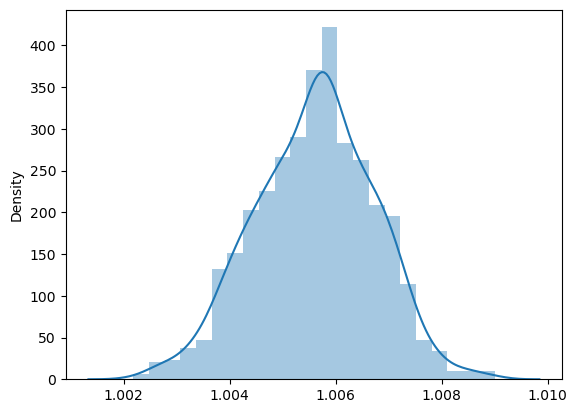

In [42]:
# Extract samples from posterior


sns.distplot(alpha_samples)


# Alternate plotting due to deprecated distplot-function
#sns.histplot(data=posterior_samples["alpha"], kde=True, stat='density', color=next(palette), element="step")
#sns.histplot(data=posterior_samples["sigma"], kde=True, stat='density', color=next(palette), element="step")


plt.show()

In [43]:
X_train_regression

,temp,atemp,humidity,windspeed,season_0,season_1,season_2,season_3,holiday_0,holiday_1,...,workingday_1,weather_0,weather_1,weather_2,weather_3,time_range_0,time_range_1,time_range_2,time_range_3,time_range_4
0,9.84,14.395,81,0.0000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
2,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
3,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
10882,14.76,17.425,57,15.0013,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,1,0
10883,13.94,15.910,61,15.0013,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,1
10884,13.94,17.425,61,6.0032,0,0,0,1,1,0,...,1,1,0,0,0,0,0,0,0,1


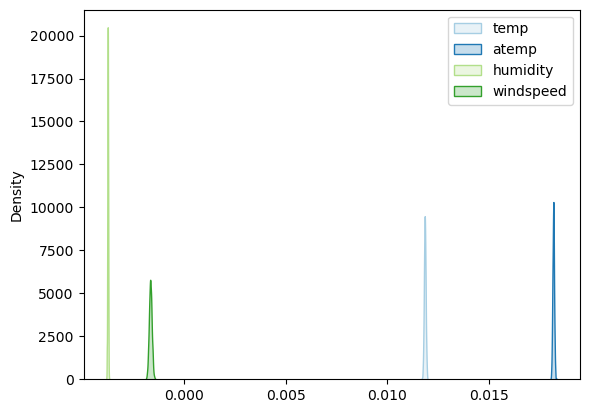

In [44]:
# For numerical variables : 
color = sns.color_palette("Paired");
list_labels = ["temp", "atemp", "humidity", "windspeed"]
for i in range(4) : 
    sns.kdeplot(beta_samples[:,0,i], color = color[i], label = list_labels[i], fill = True)
    
plt.legend();

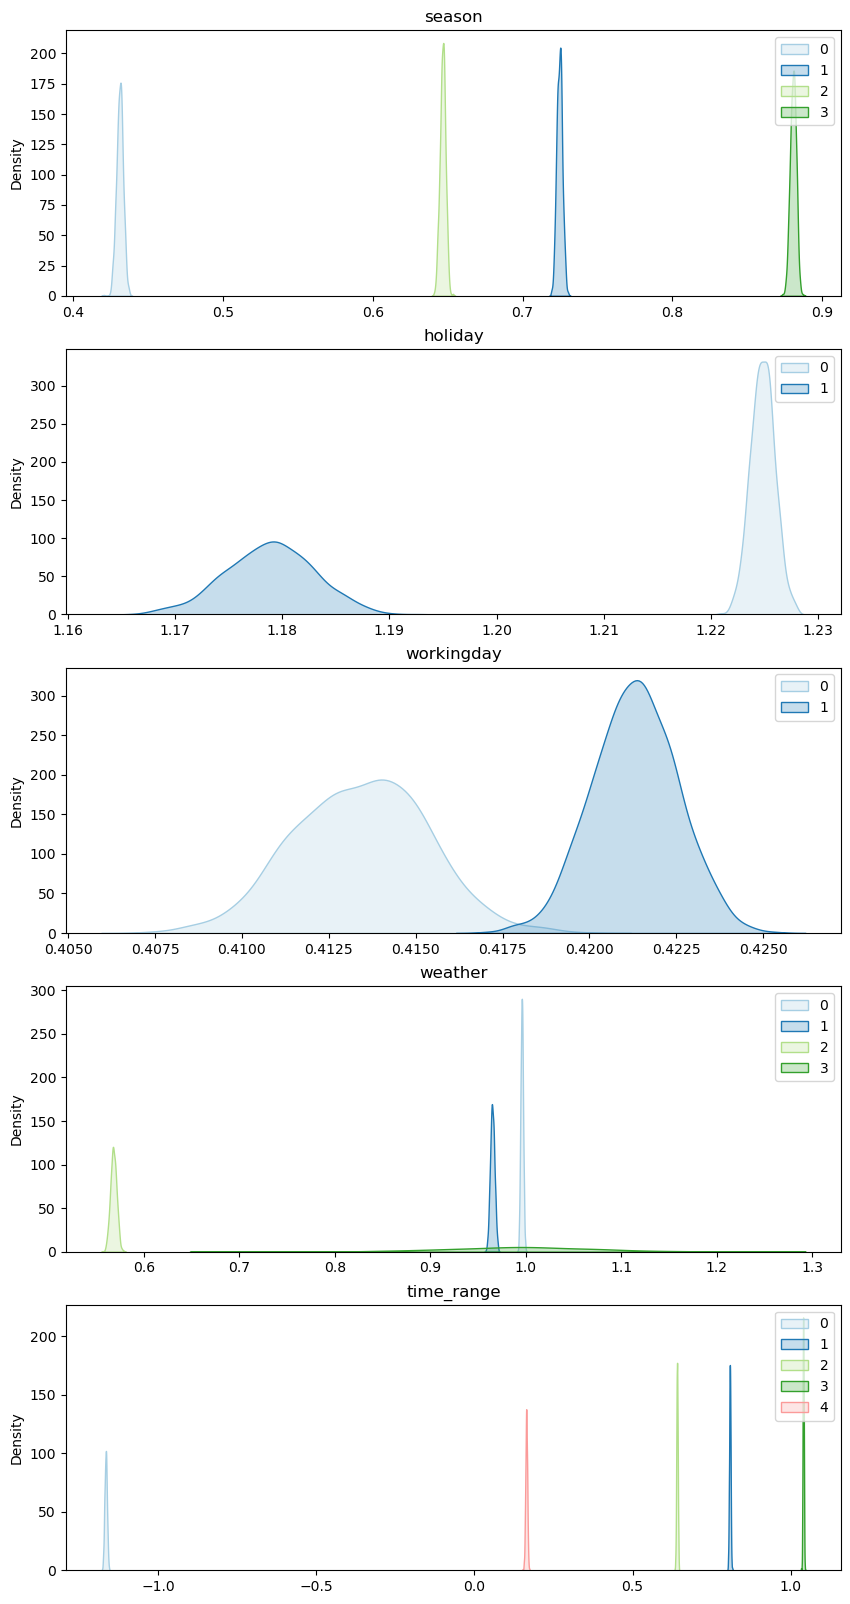

In [54]:
# For categorical variables : 
fig, ax = plt.subplots(5,1, figsize = (10,20))
list_labels = ["season", "holiday", "workingday", "weather", "time_range"]
list_seasons = ["spring", "summer", "fall", "winter"]
list_weather = ["Clear, Few clouds, Partly cloudy, Partly cloudy", "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist", "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", ""]
prev_categories = 0 
for i in range(5) : 
    categories = len(np.unique(X_train[list_labels[i]]))
    samples = beta_samples[:,0,4+prev_categories:4+prev_categories + categories]
    prev_categories += categories 
    color = sns.color_palette("Paired");
    list_categories = [x for x in range(categories)]
    for j in range(samples.shape[1]) : 
        sns.kdeplot(samples[:,j], color = color[j], label = list_categories[j], fill = True, ax = ax[i])
        ax[i].legend();
        ax[i].set_title(list_labels[i])
    

In [79]:
y_hat[120]

17.0

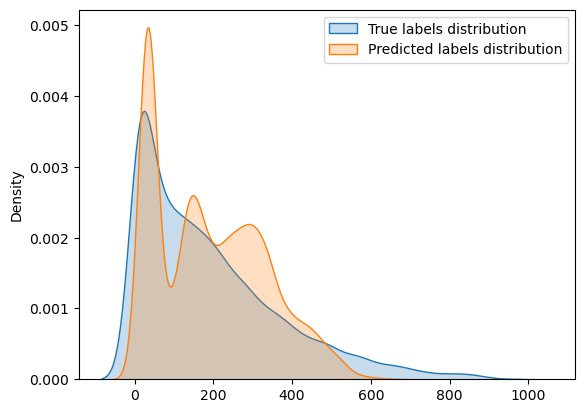

In [85]:
sns.kdeplot(Y_train_regression, fill = True, label = "True labels distribution")
sns.kdeplot(y_hat, fill = True, label = "Predicted labels distribution")
plt.legend();

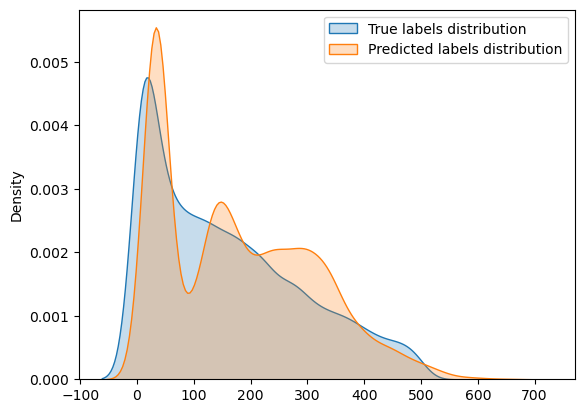

In [86]:
Y_train_regression_small = Y_train_regression[Y_train_regression < 500]
y_hat_small = y_hat[Y_train_regression < 500]
sns.kdeplot(Y_train_regression_small, fill = True, label = "True labels distribution")
sns.kdeplot(y_hat_small, fill = True, label = "Predicted labels distribution")
plt.legend();

In [87]:
corr, mae, rae, rmse, r2 = compute_error(Y_train_regression_small, y_hat_small)
print("CorrCoef: %.3f\nMAE: %.3f\nRMSE: %.3f\nR2: %.3f" % (corr, mae, rmse, r2))

CorrCoef: 0.783
MAE: 66.141
RMSE: 89.689
R2: 0.544
